In [1]:
import os
import sys
import time
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt, ticker
from pyproj import Geod
from pysar.simulation.plot import *
from pysar.objects import timeseries, ifgramStack, sensor
from pysar.utils import readfile, ptime, plot as pp, writefile, utils as ut

## 
## http://geodesy.unr.edu/NGLStationPages/DataHoldings.txt

work_dir = '/Users/yunjunz/development/python/2018_ComputGeosci_PySAR/pysar_vs_gps'
os.chdir(work_dir)
print('Go to directory: '+work_dir)

Go to directory: /Users/yunjunz/development/python/2018_ComputGeosci_PySAR/pysar_vs_gps


In [11]:

stat_id = 'GV04'
env_file = '/Users/yunjunz/insarlab/Galapagos/GPS/{}.IGS08.tenv3'.format(stat_id)

env_content = np.loadtxt(env_file, dtype=bytes).astype(str)
env_name = env_content[0, :]
env_data = env_content[1:, :]

# get station lat/lon
ref_lon, ref_lat = float(env_data[0, 6]), 0.
e0, e_off, n0, n_off = env_data[0, 7:11].astype(np.float)
e0 += e_off
n0 += n_off

az = np.arctan2(e0, n0) / np.pi * 180.
dist = np.sqrt(e0**2 + n0**2)
g = Geod(ellps='WGS84')
stat_lon, stat_lat = g.fwd(ref_lon, ref_lat, az, dist)[0:2]

# displacement time-series
gps_dates = [dt(*time.strptime(i, "%y%b%d")[0:5]) for i in env_data[:, 1]]
dis_e, dis_n, dis_u = env_data[:, (8,10,12)].astype(np.float).T
gps_dis = ut.enu2los(dis_e, dis_n, dis_u)
print('Done.')

Done.


In [12]:
pysar_dir = '/Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/'
lookup_file = pysar_dir+'INPUTS/geometryRadar.h5'
ts_file = pysar_dir+'timeseries_ECMWF_demErr_refDate_plane.h5'
atr = readfile.read_attribute(ts_file)
y, x = ut.glob2radar(stat_lat, stat_lon, lookup_file, atr, print_msg=False)[0:2]

box = (x, y, x+1, y+1)
date_list = timeseries(ts_file).get_date_list()
pysar_dis = readfile.read(ts_file, box=box)[0]
pysar_dates = ptime.date_list2vector(date_list)[0]

reading timeseries data from file: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/timeseries_ECMWF_demErr_refDate_plane.h5 ...


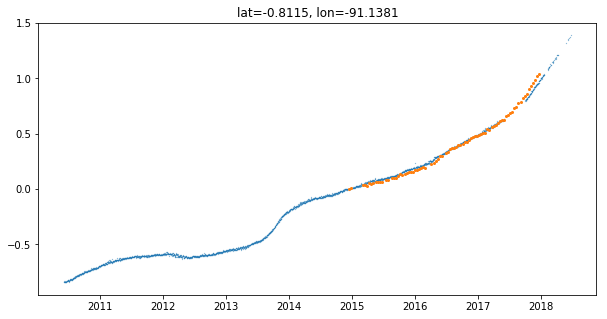

In [17]:
title = 'lat={:.4f}, lon={:.4f}'.format(stat_lat, stat_lon)
pysar_dis -= pysar_dis[0]
gps_dis -= gps_dis[gps_dates.index(pysar_dates[0])]

plt.figure(figsize=(10, 5))
plt.scatter(gps_dates, gps_dis, s=0.2**2)
plt.scatter(pysar_dates, pysar_dis, s=2**2)
plt.title(title)
plt.show()

In [47]:
268.8619 - 360.

-91.13810000000001